In [1]:
import torch
import os
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../utils/')
import FigureConfig as FC

In [3]:
# datasets = os.listdir('./evaluation/')
# datasets = [f for f in datasets if f.startswith('result_')]
# datasets.sort()
# datasets

In [4]:
alpha = torch.linspace(0,1,51)

In [5]:
result = torch.load('result.matrix')
result.shape

torch.Size([13, 10, 51, 4])

In [6]:
result_table = result.clone()
mean_acc_0 = result_table[:,:,0,2].mean(1)
mean_power_0 = result_table[:,:,0,3].mean(1)
mean_acc_25 = result_table[:,:,12,2].mean(1)
mean_power_25 = result_table[:,:,12,3].mean(1)
mean_acc_50 = result_table[:,:,25,2].mean(1)
mean_power_50 = result_table[:,:,25,3].mean(1)
mean_acc_75 = result_table[:,:,37,2].mean(1)
mean_power_75 = result_table[:,:,37,3].mean(1)
mean_acc_100 = result_table[:,:,50,2].mean(1)
mean_power_100 = result_table[:,:,50,3].mean(1)

std_acc_0 = result_table[:,:,0,2].std(1)
std_power_0 = result_table[:,:,0,3].std(1)
std_acc_25 = result_table[:,:,12,2].std(1)
std_power_25 = result_table[:,:,12,3].std(1)
std_acc_50 = result_table[:,:,25,2].std(1)
std_power_50 = result_table[:,:,25,3].std(1)
std_acc_75 = result_table[:,:,37,2].std(1)
std_power_75 = result_table[:,:,37,3].std(1)
std_acc_100 = result_table[:,:,50,2].std(1)
std_power_100 = result_table[:,:,50,3].std(1)

In [7]:
table = torch.stack([mean_acc_0, std_acc_0, mean_power_0, std_power_0,
                     mean_acc_25, std_acc_25, mean_power_25, std_power_25,
                     mean_acc_50, std_acc_50, mean_power_50, std_power_50,
                     mean_acc_75, std_acc_75, mean_power_75, std_power_75,
                     mean_acc_100, std_acc_100, mean_power_100, std_power_100]).T
table = table.numpy()
np.savetxt('resut_table.txt', table, delimiter='\t', fmt='%0.5f')

# figure

In [8]:
result_seed_mean = result.mean(1)
result_seed_mean[8,:,:] = result_seed_mean[1,:,:]
result_seed_mean = result_seed_mean[:,:,2:]
result_seed_mean.shape

torch.Size([13, 51, 2])

In [9]:
for ds in range(13):
    result_seed_mean[ds,:,0] = result_seed_mean[ds,:,0] / result_seed_mean[ds,0,0]
    result_seed_mean[ds,:,1] = result_seed_mean[ds,:,1] / result_seed_mean[ds,0,1]

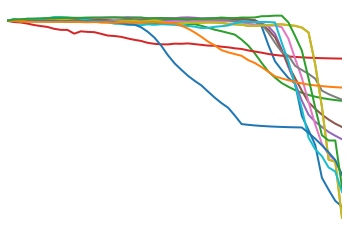

In [10]:
for ds in range(13):
    plt.plot(alpha, result_seed_mean[ds,:,0], lw=2, label=f'{ds}')
plt.xlim([0,1])
plt.ylim([0.3,1.05])
plt.axis('off')
plt.savefig("../figures/single_acc.pdf", format='pdf', bbox_inches='tight', transparent=True)

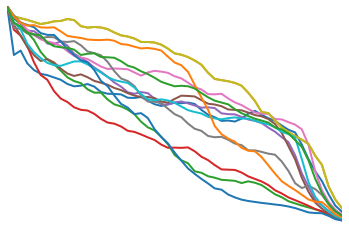

In [11]:
for ds in range(13):
    plt.plot(alpha, result_seed_mean[ds,:,1], lw=2)
plt.xlim([0,1])
plt.ylim([0,1])
plt.axis('off')
plt.savefig("../figures/single_power.pdf", format='pdf', bbox_inches='tight', transparent=True)

# analysis

In [12]:
result.shape

torch.Size([13, 10, 51, 4])

In [13]:
result_ds_mean = result.mean(0)
result_ds_mean = result_ds_mean[:,:,2:]
result_ds_mean.shape

torch.Size([10, 51, 2])

In [14]:
summary_mean = result_ds_mean.mean(0)
summary_std  = result_ds_mean.std(0)

In [15]:
acc_factor = summary_mean[0,0]
mean_acc = summary_mean[:,0] / acc_factor
std_acc = summary_std[:,0] / acc_factor

power_factor = summary_mean[0,1]
mean_power = summary_mean[:,1] / power_factor
std_power = summary_std[:,1] / power_factor

acc_factor, power_factor

(tensor(0.8786, dtype=torch.float64), tensor(0.2475, dtype=torch.float64))

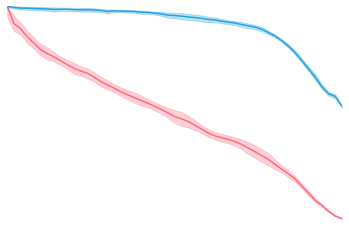

In [16]:
# draw std
plt.fill_between(alpha, mean_acc-std_acc, np.where(mean_acc+std_acc < 1, mean_acc+std_acc, 1), alpha=0.3, color=FC.Cyan);
plt.fill_between(alpha, mean_power-std_power, np.where(mean_power+std_power < 1, mean_power+std_power, 1), alpha=0.3, color=FC.Pink);
# draw mean
plt.plot(alpha, mean_acc, color=FC.Cyan);
plt.plot(alpha, mean_power, color=FC.Pink);

plt.xlim([0,1])
plt.ylim([0,1])
plt.axis('off')
plt.savefig("../figures/both.pdf", format='pdf', bbox_inches='tight', transparent=True)

In [17]:
acc_points = result_ds_mean[:,:,0] / acc_factor
power_points = result_ds_mean[:,:,1] / power_factor

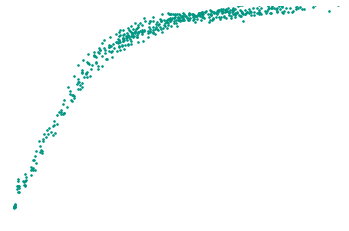

In [19]:
plt.scatter(power_points.flatten(), acc_points.flatten(), color=FC.Green, s=2.5)
plt.xlim([0,1.1])
plt.ylim([0.5,1])
plt.axis('off')
plt.savefig("../figures/both.pdf", format='pdf', bbox_inches='tight', transparent=True)